In [53]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [54]:
def binary_combinations(n):
    '''returns list of all binary combinations necessary for the AND-Gate'''
    return list(product([0, 1], repeat=n))

In [55]:
class Perceptron:
    '''Class for a Perceptron with n inputs'''
    def __init__(self, dimension) -> None:
        '''Initializes the perceptron with random weights and bias'''    
        self.dimension = dimension
        self.inputs = binary_combinations(dimension)
        self.outputs = [0 for _ in range(len(self.inputs))]
        self.weights = np.random.uniform(-10, 10, dimension+1)
        self.bias = 1
        self.learning_rate = 0.5

    def activation_function(self, x):
        '''Activation function for the perceptron'''
        if x > 0:
            return 1
        return 0    
    
    def predict(self, x):
        '''Predicts the output for a given input'''
        x = np.append(x, self.bias)
        return self.activation_function(np.dot(x, self.weights))
    
    def train(self):
        '''Trains the perceptron'''
        for i in range(len(self.inputs)):
            prediction = self.predict(self.inputs[i])
            error = self.outputs[i] - prediction 
            for j in range(len(self.weights)):
                if(j == len(self.weights)-1):
                    self.weights[j] += self.learning_rate * error * self.bias
                else:
                    self.weights[j] += self.learning_rate * error * self.inputs[i][j]

    def test(self):
        '''Tests the perceptron'''
        count = 0
        for i in range(len(self.inputs)):
            prediction = self.predict(self.inputs[i])
            if(prediction == self.outputs[i]):
                count += 1
        return count

In [56]:
class AND_Gate(Perceptron):
    '''Class for a AND-Gate with n inputs'''
    def __init__(self, dimension) -> None:
        '''Initializes a perceptron with n inputs and the corresponding outputs for a AND-Gate'''
        super().__init__(dimension)
        self.outputs = [0 for _ in range(len(self.inputs)-1)]
        self.outputs.append(1)
            
    
class OR_Gate(Perceptron):
    '''Class for a OR-Gate with n inputs'''
    def __init__(self, dimension) -> None:
        '''Initializes a perceptron with n inputs and the corresponding outputs for a OR-Gate'''     
        super().__init__(dimension)
        self.outputs = [1 for _ in range(len(self.inputs)-1)]
        self.outputs.append(0)        

class XOR_Gate(Perceptron):
    '''Class for a XOR-Gate with n inputs'''
    def __init__(self, dimension) -> None:
        '''Initializes a perceptron with n inputs and the corresponding outputs for a XOR-Gate'''
        super().__init__(dimension)
        self.outputs = [1 for _ in range(len(self.inputs)-1)]
        self.outputs.append(0)
        self.outputs[0] = 0

#### AND Gate training

In [71]:
and_gate = AND_Gate(2)
iteration = 0
loss = [1-and_gate.test()/len(and_gate.inputs)]
weight_history = [and_gate.weights.copy()]
while not and_gate.test() == len(and_gate.inputs):
    and_gate.train()
    weight_history.append(and_gate.weights.copy())
    loss.append(1-and_gate.test()/len(and_gate.inputs))
    iteration += 1

print("AND-Gate trained after " + str(iteration) + " iterations")
print("AND-Gate weights: " + str(and_gate.weights))


AND-Gate trained after 13 iterations
AND-Gate weights: [ 0.9027284   0.41114482 -0.97428108]


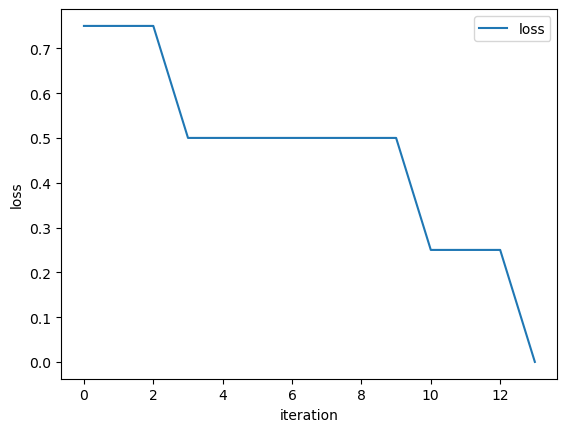

In [95]:
plt.plot(loss)
plt.legend(['loss'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

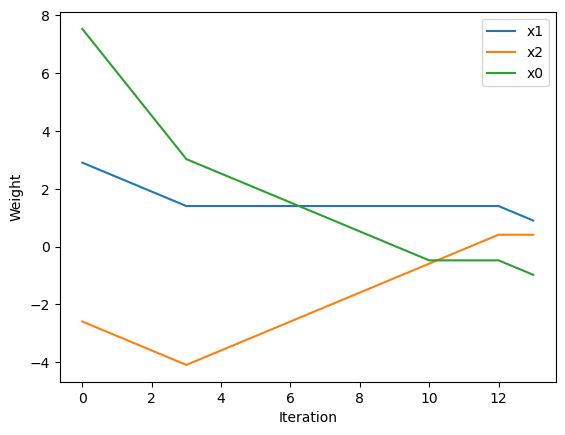

In [93]:
#plot weight history
for i in range(len(weight_history[0])):
    plt.plot([weight_history[j][i] for j in range(len(weight_history))])
plt.legend(["x1", "x2", "x0"])
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.show()

#### OR Gate training

In [108]:
iteration = 0
or_gate = OR_Gate(2)
loss_2 = [1-or_gate.test()/len(or_gate.inputs)]
weight_history_2 = [or_gate.weights.copy()]
while not or_gate.test() == len(or_gate.inputs):
    or_gate.train()
    weight_history_2.append(or_gate.weights.copy())
    loss_2.append(1-or_gate.test()/len(or_gate.inputs))
    iteration += 1
print("OR-Gate trained after " + str(iteration) + " iterations")
print("OR-Gate weights: " + str(or_gate.weights))

OR-Gate trained after 22 iterations
OR-Gate weights: [-1.31049852 -1.70904526  2.68387481]


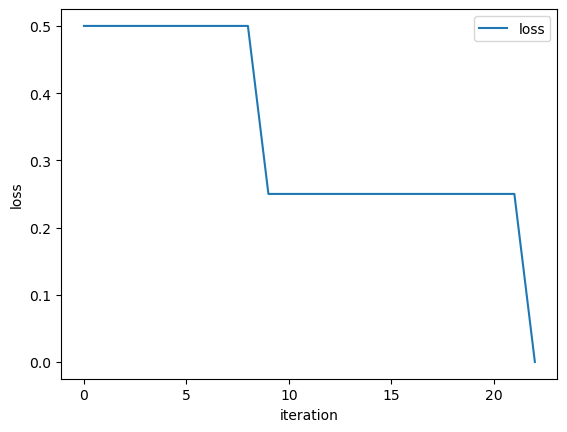

In [109]:
plt.plot(loss_2)
plt.legend(['loss'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

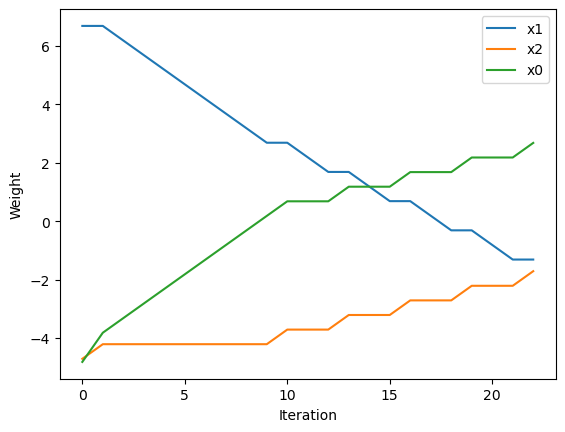

In [110]:
for i in range(len(weight_history_2[0])):
    plt.plot([weight_history_2[j][i] for j in range(len(weight_history_2))])
plt.legend(["x1", "x2", "x0"])
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.show()

#### XOR Gate Training

XOR Gates with only one perceptron are not possible. The following code does not terminate.

In [ ]:
xor_gate = XOR_Gate(2)
iteration = 0
while not xor_gate.test() == len(xor_gate.inputs):
    xor_gate.train()
    iteration += 1
print("OR-Gate trained after " + str(iteration) + " iterations")
print("OR-Gate weights: " + str(xor_gate.weights))